
### <center>Anomaly Detection.</center>
#####           <center>(Using Elliptic Envelope to detect anomalies)</center>
#####           <center>(Testing with Adaboost(Decision Trees), SOM(from SuSi), Median regression[soon] and Mean regression[soon])</center>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [ ]:
data_full = pd.read_csv('DataDR15.csv')
data_frel = pd.read_csv('Full_Rel.csv')
data_rel = pd.read_csv('Rel.csv')
data_un = pd.read_csv('Unrel.csv')

In [ ]:
rel = data_frel.drop(['specObjID', 'objid', 'specType', 'photpType'], axis = 1).copy()
unrel = data_un.drop(['specObjID', 'objid', 'specType', 'photpType'], axis = 1).copy()

In [ ]:
data_full.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_frel.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_rel.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_un.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
# Normalize 
def NormalizeData(data):
    for i in data.columns:
        if((i == 'CountR') or (i == 'specz')):
                pass
        else:
            data[i] = (data[i]-data[i].mean())/data[i].std()
    return data

In [ ]:
rel = NormalizeData(rel).drop(['zWarning'], axis = 1)
unrel = NormalizeData(unrel).drop(['zWarning'], axis = 1)
# CountR for rel is 0 and unrel is 2

In [ ]:
# Returns a contaminated dataset with 'a' reliable and 'b' unreliable data points
def prepare_dataset(dRel, dUnrel, a, b):
    return pd.DataFrame(dRel.head(int(a)).append(dUnrel.head(int(b))))

In [ ]:
# Anomaly identification with EE
from sklearn.covariance import EllipticEnvelope

In [ ]:
def NurNr():
    N_ur = np.random.randint(100, 2420, 1)
    N_r = np.random.randint(3*N_ur, 100000, 1)
    return N_ur, N_r
N_ur, N_r = NurNr()

In [ ]:
print(N_ur, N_r)

[711] [97837]


In [ ]:
data_final = prepare_dataset(rel, unrel, N_r, N_ur)

In [ ]:
data_final

,Unnamed: 0,ra,dec,specz,specz_err,dered_u,dered_g,dered_r,dered_i,dered_z,...,modelMagErr_r,modelMagErr_i,modelMagErr_z,petroRad_r,petroRadErr_r,color_gi,color_gr,color_ri,color_zr,CountR
0,-1.753036,0.187404,-1.191252,0.099074,-0.004559,-0.279651,-1.392589,-1.290779,-0.288001,-1.293359,...,-0.318760,-0.002686,-0.292405,0.516573,0.351019,-0.146160,-1.196452,-0.046732,0.779641,0
1,-1.753035,0.192135,-1.195265,0.079820,-0.004551,-0.345828,-1.900775,-2.014231,-0.475762,-2.185006,...,-0.336043,-0.002990,-0.322435,0.968800,0.348773,-0.115323,-0.835753,-0.045945,0.733913,0
2,-1.753034,0.193822,-1.191458,0.079575,-0.004561,-0.270399,-1.236767,-1.119223,-0.244555,-1.109773,...,-0.323002,-0.002775,-0.305990,-0.147804,0.349393,-0.141231,-1.148259,-0.045813,0.709854,0
3,-1.753033,0.195348,-1.191582,0.009237,-0.004553,-0.425636,-2.290671,-2.175405,-0.479830,-1.843285,...,-0.307465,-0.002348,-0.197529,6.707428,0.354317,-0.234210,-1.803158,-0.084443,2.287966,0
4,-1.753031,0.237899,-1.191973,0.071525,-0.004555,-0.290919,-1.637185,-1.656973,-0.376577,-1.710422,...,-0.335334,-0.002976,-0.324252,-0.167105,0.348995,-0.133147,-0.966028,-0.052954,0.855692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,-0.535735,0.897302,1.500469,0.729165,-0.154940,1.186285,1.630057,1.473932,0.864203,0.054565,...,4.049921,0.710248,-0.147621,-0.030540,-1.249450,1.383605,0.624671,1.226222,-2.046977,2
707,-0.764499,0.911964,1.505021,1.435578,-0.154936,0.944550,-0.129048,-0.352033,-0.547455,-0.552350,...,-0.662729,-0.375436,-0.563464,-0.093561,0.800713,0.489368,0.310764,0.322769,-0.246443,2
708,-0.806952,0.660637,1.452347,1.616375,-0.265387,-0.073804,0.070227,0.539944,0.331750,0.119225,...,0.327961,0.006048,-0.145795,-0.245007,0.802730,-0.308605,-0.702328,0.421821,-0.614562,2
709,-0.901065,0.772335,1.508977,0.925932,-0.154919,0.587294,0.412028,0.851869,0.547446,-0.128373,...,0.920634,0.165956,-0.334234,-0.169925,-1.249450,-0.061594,-0.575725,0.622106,-1.401096,2


In [ ]:
a = ['Unnamed: 0', 'ra', 'dec', 'dered_u','dered_g', 'dered_i', 'dered_z', 'modelMagErr_u','modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', 'modelMagErr_z','petroRadErr_r']
data_final.drop(a, axis = 1, inplace = True)

In [ ]:
# Cross Validation set needs to take only reliable redshifts for obvious reasons
n = np.array(data_final).shape[0] 
cross_val = data_final.head(int(n/2)).copy()
training = data_final.copy() # contains all all unreliable redshifts because of the append order

In [ ]:
training.columns

Index(['specz', 'specz_err', 'dered_r', 'petroRad_r', 'color_gi', 'color_gr',
       'color_ri', 'color_zr', 'CountR'],
      dtype='object')

###          <center>Elliptical Envelope Technique</center>

In [ ]:
def id_perc_cor(df):
    outL = 0 # Correctly identified outlier
    inL = 0 # Correctly identified inlier
    n = len(df['CountR'])
    o = len(df[df['CountR']==2]['CountR'])
    i = len(df[df['CountR']==0]['CountR'])
    for i in range(n):
        if ((df['CountR'].iloc[i] == 2) & (df['In'].iloc[i] == -1)):
            outL += 1
        elif ((df['CountR'].iloc[i] == 0) & (df['In'].iloc[i] == 1)):
            inL += 1
    if((outL!=0) & (inL!=0)):
#         print(outL/o, ' fraction of Outliers correctly identified and ', inL/i, ' fraction of Inliers correctly identified')
        return[outL/o, inL/i]
    elif(outL == 0):
#         print('No outliers')
        return[0, 1]
    elif(inL == 0):
#         print('No inliers')
        return[1, 0]

In [ ]:
def ElepEnv(df, n):
    clf = EllipticEnvelope(contamination=n,random_state=0)
    clf.fit(df)
#     ee_scores = pd.Series(clf.decision_function(df)) 
    ee_predict = clf.predict(df)
    return ee_predict

In [ ]:
def Tune_EE(param, df):
    s = []
    for i in param:
        df['In'] = list(ElepEnv(df, i))
        a, b = id_perc_cor(df)
#         print('Contamination Parameter ', i, ' gives correct outliers ', 100*a, '% and correct inliers', 100*b, ' %')
        s.append(np.array([i, a, b]))
#         a is outL and b is inL
    return s

In [ ]:
params =  [0, 0.001, 0.01, 0.020, 0.030, 0.040, 0.050, 0.060,  0.070, 0.080, 0.090, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
performance = Tune_EE(params, training)

In [ ]:
vizPerformance = pd.DataFrame(np.array(performance), columns = ['ContPar', 'OutL', 'InL'])

In [ ]:
vizPerformance

,ContPar,OutL,InL
0,0.000,0.000000,1.000000
1,0.001,0.049226,0.992146
2,0.010,0.998594,0.989995
3,0.020,1.000000,0.980010
4,0.030,1.000000,0.970004
5,0.040,1.000000,0.960009
6,0.050,1.000000,0.950004
7,0.060,1.000000,0.940008
8,0.070,1.000000,0.930003
9,0.080,1.000000,0.920008


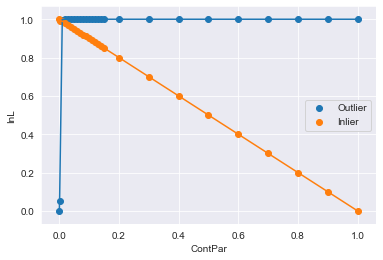

In [ ]:
sns.lineplot(x = 'ContPar', y = 'OutL', data = vizPerformance)
plt.scatter(vizPerformance['ContPar'], vizPerformance['OutL'], label = 'Outlier')
sns.lineplot(x = 'ContPar', y = 'InL', data = vizPerformance)
plt.scatter(vizPerformance['ContPar'], vizPerformance['InL'], label = 'Inlier')
plt.legend()

In [ ]:
# Plot Some other graphs properly later, take more cont par and plot with 1 sigma
# You can try randomizing the selection of unreliable redshifts, but it is expected to give more or less similar results  

In [ ]:
#  Estimating the contamination fraction using the Mahalanobis distance - try later, only analytically important 

In [ ]:
training.drop(['In'], axis = 1 ,inplace = True)

In [ ]:
for i in range(len(params)):
    training['In'+str(i)] = ElepEnv(training, params[i])

* #####          The main idea is to apply the anomaly detection technique pre-training and check if there has been any improvement in performance post-training.

* #####          For this reason we test some algorithms like SOMs and Mean/Median Regression for evaluating performance on inlier + outlier data when compared to just inlier data.

* Clearly from the above graph, we see an acceptable tradeoff at **ContPar = 0.050**(EE performs very similarly in this region so hypertuning is not required), so we keep this constant and go ahead with our analysis.

In [ ]:
# Make multiple training sets - done
# train with and without outliers - to do 

In [ ]:
training.head()
training.drop(['CountR'], axis = 1, inplace = True)

In [ ]:
training.head()
# The data is negative because of the normalization

,specz,specz_err,dered_r,petroRad_r,color_gi,color_gr,color_ri,color_zr,In0,In1,...,In16,In17,In18,In19,In20,In21,In22,In23,In24,In25
0,0.099074,-0.004559,-1.290779,0.516573,-0.146160,-1.196452,-0.046732,0.779641,1,1,...,1,1,1,1,1,1,1,-1,-1,-1
1,0.079820,-0.004551,-2.014231,0.968800,-0.115323,-0.835753,-0.045945,0.733913,1,1,...,1,1,1,1,1,-1,-1,-1,-1,-1
2,0.079575,-0.004561,-1.119223,-0.147804,-0.141231,-1.148259,-0.045813,0.709854,1,1,...,1,1,1,1,1,1,1,1,-1,-1
3,0.009237,-0.004553,-2.175405,6.707428,-0.234210,-1.803158,-0.084443,2.287966,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0.071525,-0.004555,-1.656973,-0.167105,-0.133147,-0.966028,-0.052954,0.855692,1,1,...,1,1,1,1,1,1,-1,-1,-1,-1


In [ ]:
#  SOM using SuSi library
# training['specz'].max()

In [ ]:
import susi
from sklearn.model_selection import train_test_split

In [ ]:
som = susi.SOMRegressor()

* Choose data to train before ee
* Choose data to train after ee
* Train for multiple ee's(multiple ContPar)
* Make function to calculate all reqd parameters for the multiple sets of specz we get

In [ ]:
# def ilocMedian(df, z):
#     return df['z'].get_loc(df['z'].median())

# Need to find Median Absolute Deviation, 68% spread, 95% spread about median and do del>0.15

In [ ]:
def MAD(data):
    data = np.array(data)
    data = abs(data - np.median(data))
    return np.median(data)

In [ ]:
def CountDelOut(z, specz):
    data = []
    z = np.array(z)
    specz = np.array(specz)
    for i in range(len(z)):
        data.append((z[i]-specz[i])/(1+specz[i]))
    data = np.array(data)
    if len(data)>0:
        return len(data[data>0.15])/len(data)

In [ ]:
def onesd(data): # 68% spread
    data = np.array(data)
    std = np.std(data)
    med = np.median(data)
    return len(data[data>med-std])/len(data)
def twosd(data): # 95% spread
    data = np.array(data)
    std = np.std(data)
    med = np.median(data)
    return len(data[data>med-2*std])/len(data)

In [ ]:
training.columns

Index(['specz', 'specz_err', 'dered_r', 'petroRad_r', 'color_gi', 'color_gr',
       'color_ri', 'color_zr', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6',
       'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15',
       'In16', 'In17', 'In18', 'In19', 'In20', 'In21', 'In22', 'In23', 'In24',
       'In25'],
      dtype='object')

In [ ]:
new_data = training.copy()

In [ ]:
#take half of inliers and half of outliers for both test and train
data_train = new_data[ : int(N_r*0.5)].append(new_data[int(N_r) : int(N_r)+int(N_ur*0.5)]).copy()
data_test = new_data[int(N_r*0.5) : int(N_r)].append(new_data[int(N_r)+int(N_ur*0.5) : ]).copy()

In [ ]:
# X_train = data_train.drop(['specz', 'specz_err'], axis = 1)
# for i in range(len(params)):
#         X_train.drop(['In'+str(i)], axis = 1, inplace = True)

# X_test = data_test.drop(['specz', 'specz_err'], axis = 1)
# for i in range(len(params)):
#         X_test.drop(['In'+str(i)], axis = 1, inplace = True)

# y_train = data_train['specz']
# y_test = data_test['specz']

In [ ]:
data_test.columns

Index(['specz', 'specz_err', 'dered_r', 'petroRad_r', 'color_gi', 'color_gr',
       'color_ri', 'color_zr', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6',
       'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15',
       'In16', 'In17', 'In18', 'In19', 'In20', 'In21', 'In22', 'In23', 'In24',
       'In25'],
      dtype='object')

In [ ]:
def Total_SOM_beforeEE(train, test, param): # Inliers + Outliers
    mad = []
    dl = []
    sd1 = []
    sd2 = []
    X_train = train.drop(['specz', 'specz_err'], axis = 1).copy()
    X_test = test.drop(['specz', 'specz_err'], axis = 1).copy()
    y_train = train['specz'].copy()
    y_test = test['specz'].copy()
    for i in range(len(param)):
        X_train.drop(['In'+str(i)], axis = 1, inplace = True)
        X_test.drop(['In'+str(i)], axis = 1, inplace = True)
    som.fit(X_train, y_train)
    pred = som.predict(X_test)
    mad.append(MAD(pred))
    dl.append(CountDelOut(y_test, pred))
    sd1.append(onesd(pred))
    sd2.append(twosd(pred))
    return mad, dl, sd1, sd2

In [ ]:
def Total_SOM_afterEE(train, test, param):
    mad = []
    dl = []
    sd1 = []
    sd2 = []
#     print(train.columns)
    X_train = train.drop(['specz', 'specz_err'], axis = 1).copy()
#     print(X_train.columns)
    X_test = test.drop(['specz', 'specz_err'], axis = 1).copy()
    # Add a generlized loop later
    y_train = train[['specz', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15', 'In16', 'In17', 'In18', 'In19', 'In20', 'In21', 'In22', 'In23', 'In24', 'In25']].copy()
    # Add a generlized loop later
    y_test = test[['specz', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15', 'In16', 'In17', 'In18', 'In19', 'In20', 'In21',  'In22', 'In23', 'In24', 'In25']].copy()
    for i in range(len(param)):
        xtrain = X_train.copy()
#         print(xtrain.columns)
        xtest = X_test.copy()
        ytrain = y_train.copy()
        for j in range(len(param)):
            if(j==i):
                pass
            else:
                xtrain.drop(['In'+str(j)], axis = 1, inplace = True)
                ytrain.drop(['In'+str(j)], axis = 1, inplace = True)
                xtest.drop(['In'+str(j)], axis = 1, inplace = True)
        if(len(xtrain[xtrain['In'+str(i)]==1])==0):
            mad.append('NaN')
            dl.append('NaN')
            sd1.append('NaN')
            sd2.append('NaN') 
        else:
            som.fit(xtrain[xtrain['In'+str(i)]==1], ytrain[ytrain['In'+str(i)]==1]['specz'])
#             print('1')
            pred = som.predict(xtest)
            mad.append(MAD(pred))
            dl.append(CountDelOut(y_test[y_test['In'+str(i)]==1]['specz'], pred))
            sd1.append(onesd(pred))
            sd2.append(twosd(pred))
    return mad, dl, sd1, sd2

In [ ]:
Mad0, Dl0, SD10, SD20 = Total_SOM_beforeEE(data_train, data_test, params)

In [ ]:
Mad, Dl, SD1, SD2 = Total_SOM_afterEE(data_train, data_test, params)

In [ ]:
# Plot performance graphs and relative gain/loss of each feature
# Note that even if you get similar performances, it is still a gain because of runtime improvement

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adr = AdaBoostRegressor(DecisionTreeRegressor(), loss = 'linear')

In [ ]:
def Total_ADR_beforeEE(train, test, param): # Inliers + Outliers
    mad = []
    dl = []
    sd1 = []
    sd2 = []
    X_train = train.drop(['specz', 'specz_err'], axis = 1).copy()
    X_test = test.drop(['specz', 'specz_err'], axis = 1).copy()
    y_train = train['specz'].copy()
    y_test = test['specz'].copy()
    for i in range(len(param)):
        X_train.drop(['In'+str(i)], axis = 1, inplace = True)
        X_test.drop(['In'+str(i)], axis = 1, inplace = True)
    adr.fit(X_train, y_train)
    pred = som.predict(X_test)
    mad.append(MAD(pred))
    dl.append(CountDelOut(y_test, pred))
    sd1.append(onesd(pred))
    sd2.append(twosd(pred))
    return mad, dl, sd1, sd2

In [ ]:
def Total_ADR_afterEE(train, test, param):
    mad = []
    dl = []
    sd1 = []
    sd2 = []
#     print(train.columns)
    X_train = train.drop(['specz', 'specz_err'], axis = 1).copy()
#     print(X_train.columns)
    X_test = test.drop(['specz', 'specz_err'], axis = 1).copy()
    # Add a generlized loop later
    y_train = train[['specz', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15', 'In16', 'In17', 'In18', 'In19', 'In20', 'In21', 'In22', 'In23', 'In24', 'In25']].copy()
    # Add a generlized loop later
    y_test = test[['specz', 'In0', 'In1', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8', 'In9', 'In10', 'In11', 'In12', 'In13', 'In14', 'In15', 'In16', 'In17', 'In18', 'In19', 'In20', 'In21',  'In22', 'In23', 'In24', 'In25']].copy()
    for i in range(len(param)):
        xtrain = X_train.copy()
#         print(xtrain.columns)
        xtest = X_test.copy()
        ytrain = y_train.copy()
        for j in range(len(param)):
            if(j==i):
                pass
            else:
                xtrain.drop(['In'+str(j)], axis = 1, inplace = True)
                ytrain.drop(['In'+str(j)], axis = 1, inplace = True)
                xtest.drop(['In'+str(j)], axis = 1, inplace = True)
        if(len(xtrain[xtrain['In'+str(i)]==1])==0):
            mad.append('NaN')
            dl.append('NaN')
            sd1.append('NaN')
            sd2.append('NaN') 
        else:
            som.fit(xtrain[xtrain['In'+str(i)]==1], ytrain[ytrain['In'+str(i)]==1]['specz'])
#             print('1')
            pred = som.predict(xtest)
            mad.append(MAD(pred))
            dl.append(CountDelOut(y_test[y_test['In'+str(i)]==1]['specz'], pred))
            sd1.append(onesd(pred))
            sd2.append(twosd(pred))
    return mad, dl, sd1, sd2

In [ ]:
Mad0_adr, Dl0_adr, SD10_adr, SD20_adr = Total_ADR_beforeEE(data_train, data_test, params)

In [ ]:
Mad_adr, Dl_adr, SD1_adr, SD2_adr = Total_ADR_afterEE(data_train, data_test, params)

In [ ]:
# Will plot results while writing the report so that I can see what and what not to plot.